In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/home/yash/Downloads/Social_Network_Ads.csv")
df = df.iloc[:,2:5]
df.sample(5,random_state=0)

,Age,EstimatedSalary,Purchased
132,30,87000,0
309,38,50000,0
341,35,75000,0
196,30,79000,0
246,35,50000,0


In [ ]:
# Train The splite

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size = 0.3, random_state = 0s)
# Here drop function drop "Purchased" column from df and axis = 1 => Drop a column , axis = 0 => Drop a row
x_train.shape,x_test.shape,y_train.shape,y_test.shape

# train_test_split(..., random_state=0)    => Always same result
# train_test_split(..., random_state=None) => Different result each run

# We can also do that which is given bellow
# x = df.iloc[:,:2]
# y = df.iloc[:,2:]
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
# x_train.shape,x_test.shape

((280, 2), (120, 2), (280,), (120,))

In [4]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# It give x_train/test_scaled in numpy array

In [5]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)
# Concert in to DataFrame 

In [6]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [7]:
np.round(x_train_scaled.describe(),1)

,0,1
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

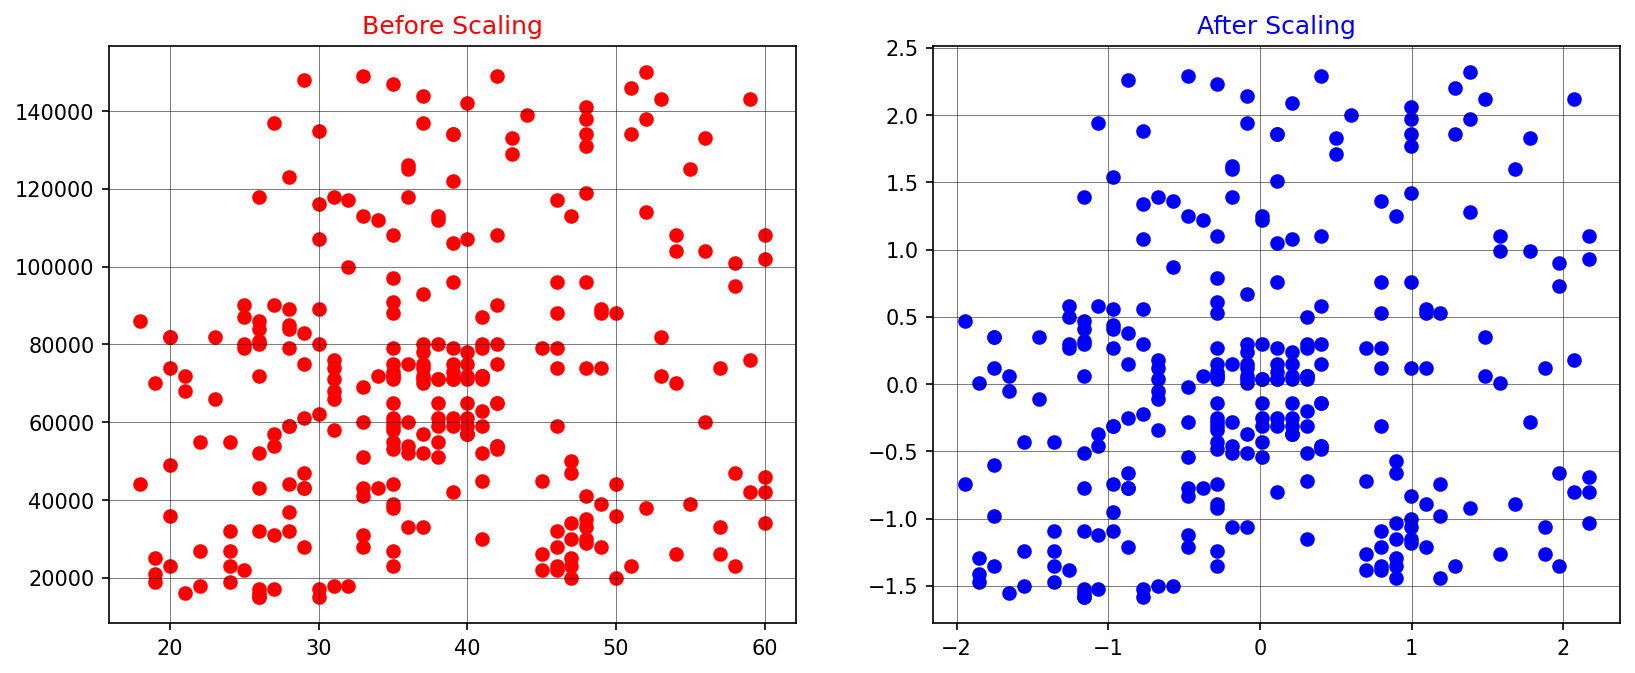

In [8]:
plt.figure(figsize = (13,5),dpi = 150)

# Before Scaling
plt.subplot(1,2,1)
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],color  = "Red")
plt.title("Before Scaling",color  = "Red")
plt.grid(color = "Black", lw = 0.5, alpha = 0.5)

# After Scaling
plt.subplot(1,2,2)
plt.scatter(x_train_scaled[0],x_train_scaled[1],color = "Blue")
plt.title("After Scaling",color = "Blue")
plt.grid(color = "Black", lw = 0.5, alpha = 0.5)

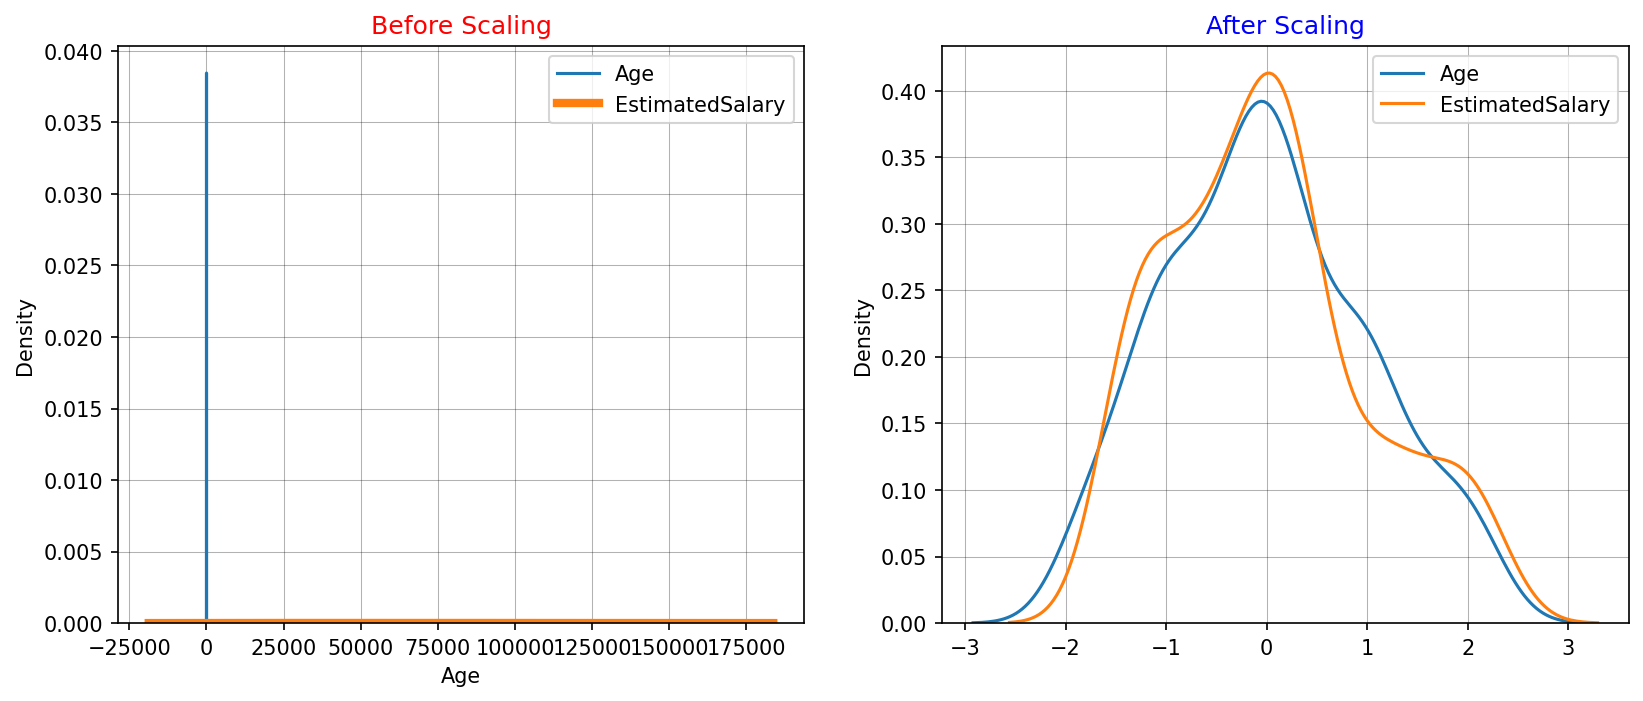

In [9]:
plt.figure(figsize = (13,5),dpi = 150)

# Before Scaling
plt.subplot(1,2,1)
sns.kdeplot(x_train["Age"], lw = 1.5,label = "Age")
sns.kdeplot(x_train["EstimatedSalary"],lw = 4, label = "EstimatedSalary")
plt.title("Before Scaling",color  = "Red")
plt.grid(color = "Black", lw = 0.5, alpha = 0.3)
plt.legend()

# After Scaling
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled.values[:,0],label = "Age")
sns.kdeplot(x_train_scaled.values[:,1], label = "EstimatedSalary")
plt.title("After Scaling",color = "Blue")
plt.grid(color = "Black", lw = 0.5, alpha = 0.3)
plt.legend()

## Comparsion of Distributions 

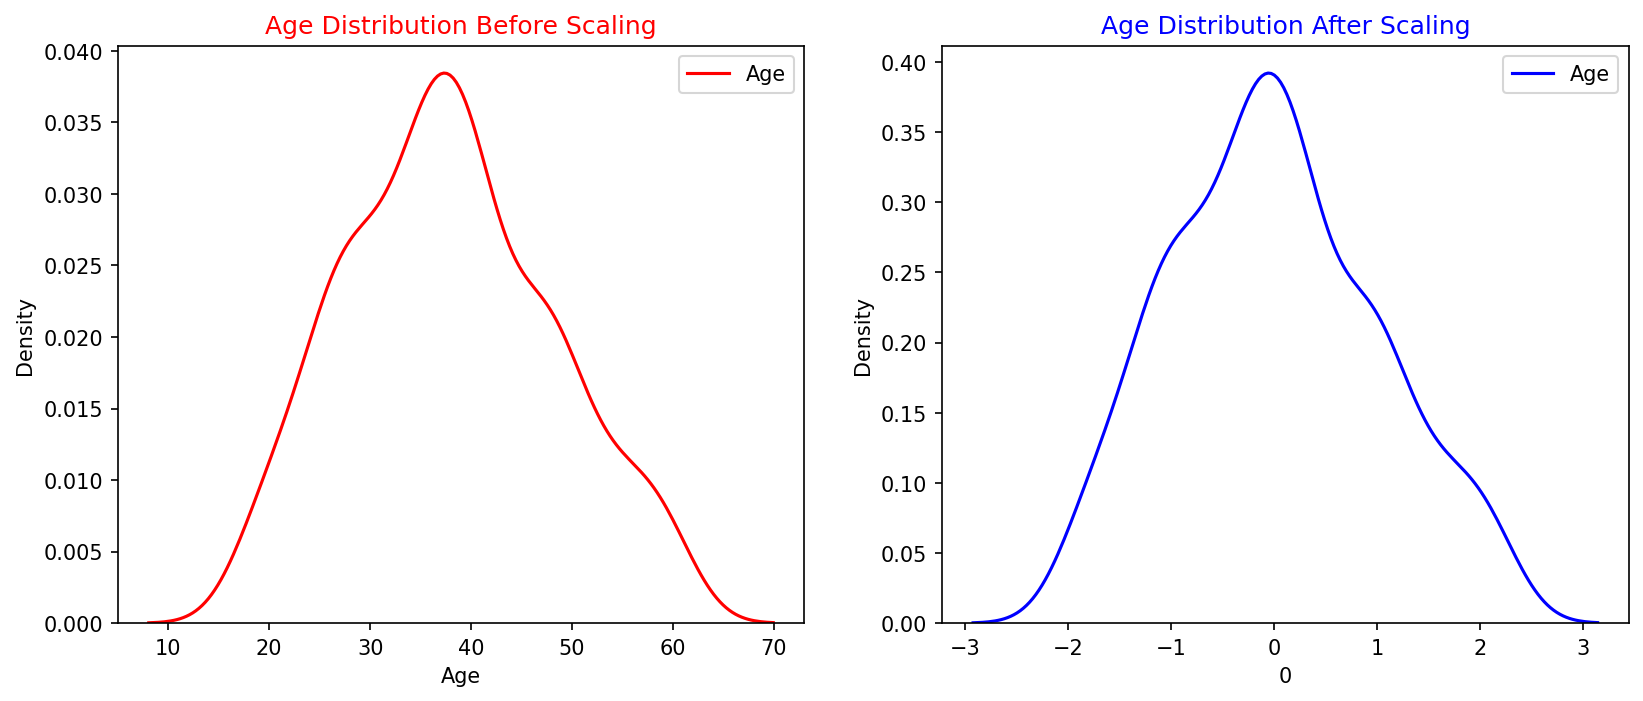

In [10]:
plt.figure(figsize =(13,5),dpi = 150)

# Before Scaling
plt.subplot(1,2,1)
plt.title("Age Distribution Before Scaling",color = "Red")
sns.kdeplot(x_train["Age"],label  = "Age",color = "Red")
plt.legend()

# After Scaling
plt.subplot(1,2,2)
plt.title("Age Distribution After Scaling",color = "Blue")
sns.kdeplot(x_train_scaled[0],label  = "Age",color = "Blue")
plt.legend()

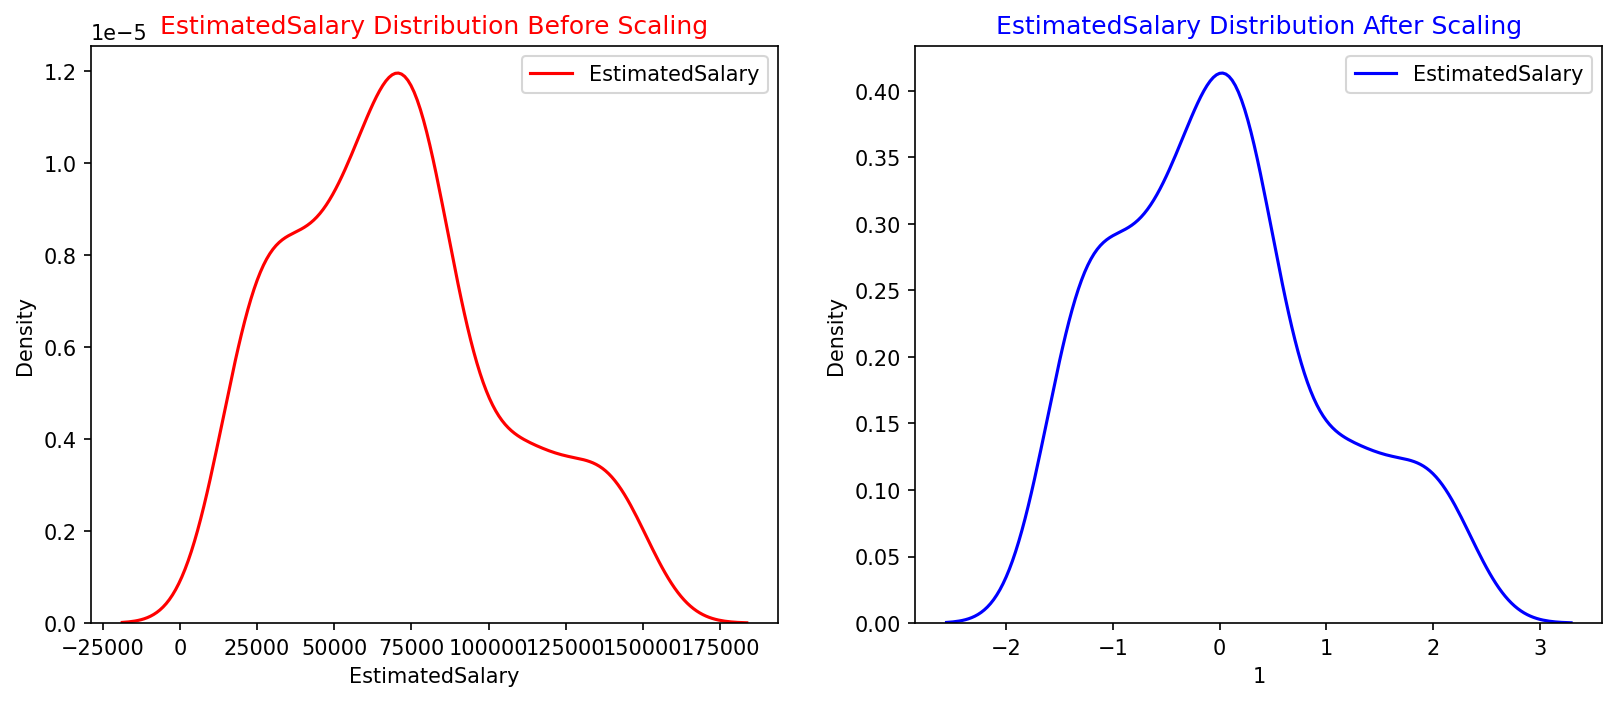

In [11]:
plt.figure(figsize =(13,5),dpi = 150)

# Before Scaling
plt.subplot(1,2,1)
plt.title("EstimatedSalary Distribution Before Scaling",color = "Red")
sns.kdeplot(x_train["EstimatedSalary"],label  = "EstimatedSalary",color = "Red")
plt.legend()

# After Scaling
plt.subplot(1,2,2)
plt.title("EstimatedSalary Distribution After Scaling",color = "Blue")
sns.kdeplot(x_train_scaled[1],label  = "EstimatedSalary",color = "Blue")
plt.legend()

## Why Scaling is Important..?

In [12]:
# Train by LogisticRegression => generally used for only two input features => in it need to scale the data

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [13]:
# Train A Model
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [14]:
# Test a Model

y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,y_pred)
ac_scaled = accuracy_score(y_test,y_pred_scaled)


In [16]:
print(f"Accuracy Score : {ac*100} %")
print(f"Accuracy Score when Scaled : {ac_scaled*100} %")

Accuracy Score : 87.5 %
Accuracy Score when Scaled : 86.66666666666667 %


In [17]:
# Train by DecisionTreeClassifier => Generally used for more than two input features => in it no need to scale the data

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [18]:
# Train A Model
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,y_pred)
ac_scaled = accuracy_score(y_test,y_pred_scaled)


In [20]:
print(f"Accuracy Score : {ac*100} %")
print(f"Accuracy Score when Scaled : {ac_scaled*100} %")

Accuracy Score : 87.5 %
Accuracy Score when Scaled : 86.66666666666667 %


## Effects of Outliers

In [21]:
# Add some outliers

df = pd.concat([df,pd.DataFrame({
    "Age" : [5,90,95],
    "EstimatedSalary" : [1000,250000,350000],
    "Purchased" : [0,1,1]
    })],
    ignore_index = True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


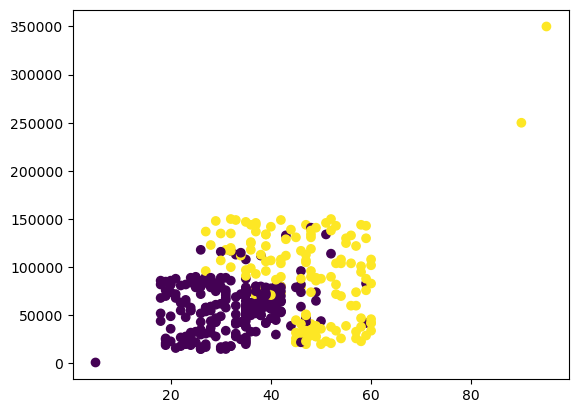

In [22]:
plt.scatter(df["Age"],df["EstimatedSalary"],c = df["Purchased"])

In [23]:
# Scale a Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1), df["Purchased"], test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

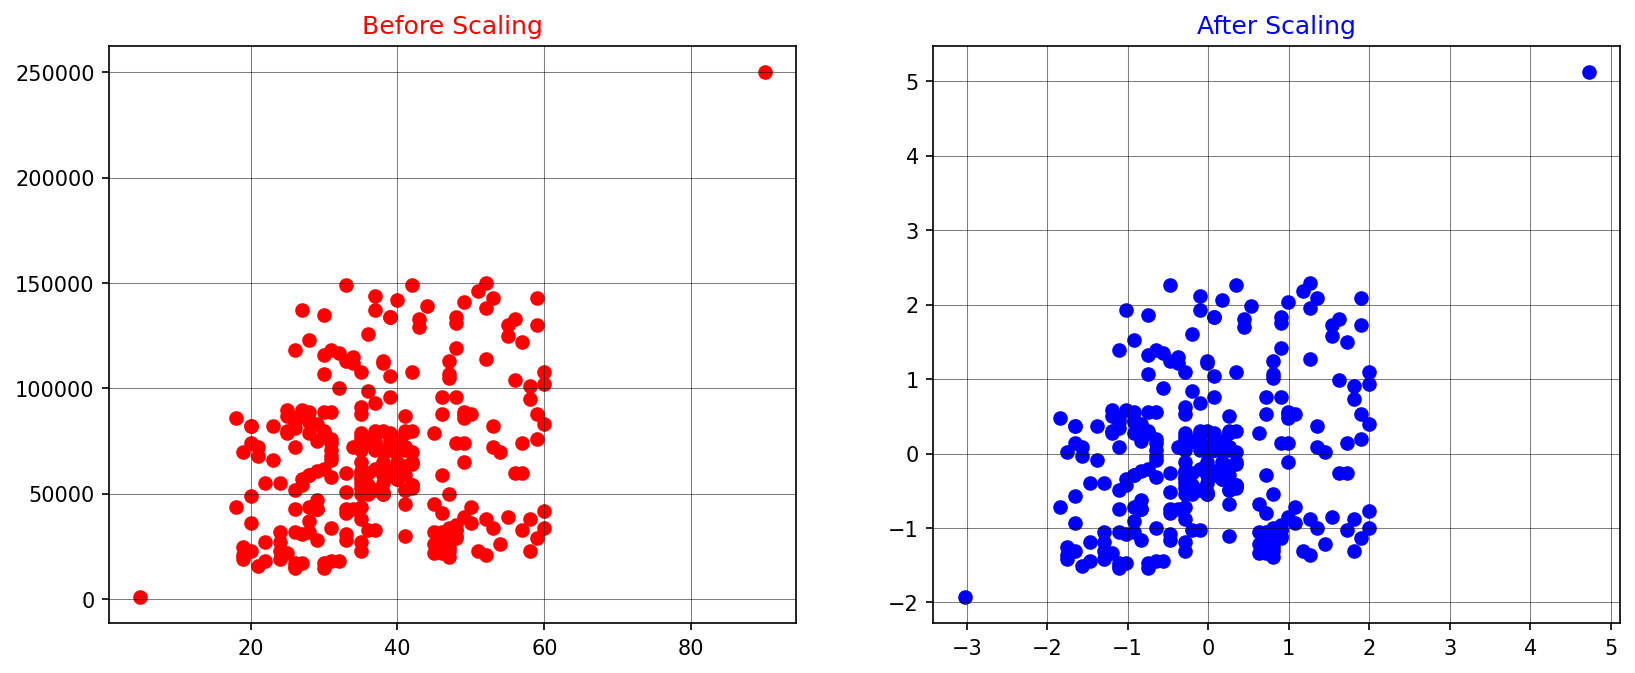

In [24]:
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

plt.figure(figsize = (13,5),dpi = 150)

# Before Scaling
plt.subplot(1,2,1)
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],color  = "Red")
plt.title("Before Scaling",color  = "Red")
plt.grid(color = "Black", lw = 0.5, alpha = 0.5)

# After Scaling
plt.subplot(1,2,2)
plt.scatter(x_train_scaled[0],x_train_scaled[1],color = "Blue")
plt.title("After Scaling",color = "Blue")
plt.grid(color = "Black", lw = 0.5, alpha = 0.5)